In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10.0, 5.0)

In [2]:
data = pd.read_csv('Pearson.csv')
data.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


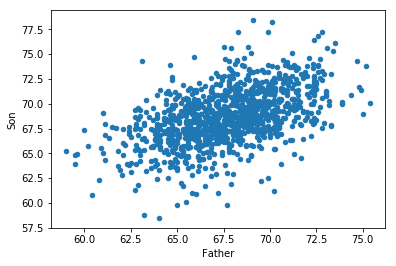

In [3]:
data.plot.scatter(x="Father", y="Son")
plt.show()

Again, set up the vector y and Matrix X as required to compute the weights w_LS

In [8]:
n = len(data)
y = data.Son.values.reshape((n,1)) # Extract as numpy array
X = np.hstack((np.ones((n,1), dtype=np.float64), data.Father.values.reshape((n,1))))

In [10]:
# Finally, "solve" the required overdetermined system of liner equations Xw = y
w_LS = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))
print(w_LS)

[[33.89280054]
 [ 0.51400591]]


Produce a 2D plot showing the data and the least-squares line of best fit

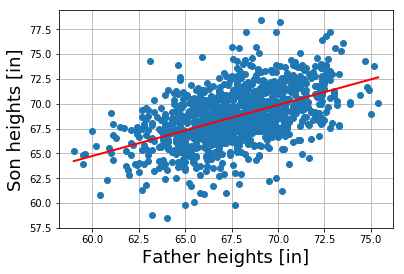

In [13]:
FF = np.linspace(data.Father.min(), data.Father.max())
SS = w_LS[0,0] + w_LS[1,0]*FF # Generate
plt.plot(X[:,1], y, 'o', FF, SS, 'r', linewidth=2)
plt.xlabel('Father heights [in]', fontsize=18)
plt.ylabel('Son heights [in]', fontsize=18)
plt.grid(True)
plt.show()


As before, compute RMSE and R2

In [14]:
ss_t = 0.0 # for accumulating the total sum of squares (i.e, differences of y[k]
# from y.mean() squared)
ss_r = 0.0 # for accumulating the sum of squared residuals
mean_y = y.mean() # compute once

b0 = w_LS[0,0]
b1 = w_LS[1,0]
for k in range(n):
    y_pred = b0 + b1*X[k,1]
    ss_r += (y_pred - y[k,0])**2
    ss_t += (y[k,0] - mean_y)**2
    
rmse = np.sqrt(ss_r/n)
r2 = 1 - (ss_r/ss_t)
print("RMSE = {}".format(rmse))
print("R-squared: {}".format(r2))

RMSE = 2.435871609139341
R-squared: 0.2511640326342506


Using Numpy's linear alebra utilities, above loops can be eliminated

In [15]:
y_pred = np.dot(X, w_LS)
ss_r = np.linalg.norm(y_pred - y)**2
rmse = np.sqrt(ss_r/n)
print("RMSE_linalg = {}".format(rmse))

RMSE_linalg = 2.43587160913934


In [16]:
ss_t = np.linalg.norm(y - y.mean())**2
r2 = 1 - (ss_r/ss_t)
print("R-squared_linalg = {}".format(r2)) # Same as above

R-squared_linalg = 0.2511640326342517


Notice that the R2 statistic is dimensionless while the RMSE is not. The former quantifies the appropriateness of the line fit in a relative sense, whereas the RMSE gives an absolute measure of misfit (which, depending on the scaling of the problem, can be deceptive)